# Applying & Visualizing Arrays

#### Welcome to lab 6! 

To recap, we've been learning about datasets and specifically arrays of data in Python. Today, we'll be applying our understanding of arrays to the real world in the form of housing prices.

#### Background:
For many college students, apartment hunting is an obstacle that is essentially inevitable. In this lab, we'll be using a dataset from Zillow (a popular marketplace for real estate) that displays the monthly median listing prices of cities near each UC school. 

<img src="UCsystem.png" width="300px" height="500px"/>

For context, a map of all of the UC's can be found above. Because of the scope of the data, we will only investigate housing prices for Berkeley, Los Angeles, Merced, Riverside, Santa Barbara, San Diego and Santa Cruz. Also, please note that due to the constrained availability of data from Zillow, we are only able to analyze each UC campus based on its surrounding area. In other words, calculations may not be exact since the overall area of each UC is generalized. For example, UCLA is located in Westwood but our data generalizes UCLA's prices to include prices from LA/Long Beach/Anaheim. This discrepancy will have no bearing on the techniques of array manipulation and visualization learned in this lab, however it is something worth noting before proceding.

In [70]:
#Importing libraries
import numpy as np
from datascience import *
from lab_funcs import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('LAB06.ok')
_ = ok.auth(inline=True)

**Submission**: Once you're finished, select "Save and Checkpoint" in the File menu and then execute the submit cell below (or at the end). The result will contain a link that you can use to check that your assignment has been submitted successfully. 

In [ ]:
_ = ok.submit()

## 1. Elementwise Operations on Arrays

### 1.1. Reviewing elementwise arithmetic

As we have previously seen, arrays are especially useful when performing the same operation multiple times. Instead of using `.item` to work with single elements, we can apply a function on an array. Let's review!


#### Question 1.1.1. 
Suppose you have some monthly CA housing prices in dollars and you'd like to compute the prices in thousands of dollars to reduce the scale. Given an array of prices below, return an array that computes the prices in thousands of dollars.

In [2]:
housing_prices = make_array(102910, 821048, 128201, 530728)
prices_in_thousands = housing_prices/1000 #SOLUTION 
prices_in_thousands

array([102.91 , 821.048, 128.201, 530.728])

In [26]:
_ = ok.grade('q111')

#### Question 1.1.2. 
Let's transition back into regular dollars instead of thousands of dollars. Compute the average monthly housing price using the function `np.average` on `housing_prices`.

##### Reminder:
The function `np.average` takes a single array of numbers as its argument and returns the average of all the numbers in that array (so it returns a number, not an array). Have we already been given an array of numbers?

In [27]:
avg_housing_prices = np.average(housing_prices) #SOLUTION
avg_housing_prices

395721.75

In [28]:
_ = ok.grade('q112')

#### Question 1.1.3. 
Let's apply what we've practiced to Berkeley housing prices in 2019. `UCB_Prices.csv` has median housing prices for each month. Similar to Question 1.1.1, use the given array of Berkeley housing prices to return an array of the same prices expressed in thousands of dollars. How is your code different?

In [10]:
berkeley_prices = Table.read_table("UCB_Prices.csv").column("UCB 2019 Price")
berkeley_in_thousands = berkeley_prices/1000 #SOLUTION
berkeley_in_thousands

array([785.8, 790.4, 789.9, 785.4, 782.6, 780.2, 770.4, 759.5, 766.8,
       782.4, 789. , 806. ])

In [30]:
_ = ok.grade('q113')

#### Question 1.1.4. 
What was the average price of Berkeley housing listings in 2019 expressed in thousands of dollars? 

##### Hint:
How can we utilize a function on an array where we have already calculated prices in thousands of dollars?

In [13]:
berkeley_avg_in_thousands = np.average(berkeley_in_thousands) #SOLUTION
berkeley_avg_in_thousands

782.3666666666668

In [32]:
_ = ok.grade('q114')

## 2. UC Housing Prices

In this portion of the lab, we will extend our understanding to the housing prices of other UC's. The following cell creates arrays for the median housing prices of all UC's (excluding Irvine, SF, Davis) in both 2009 and 2019. 

In [25]:
berkeley_2009 = Table.read_table("UCB_Prices.csv").column("UCB 2009 Price")
berkeley_2019 = Table.read_table("UCB_Prices.csv").column("UCB 2019 Price")

ucla_2009 = Table.read_table("UCLA_Prices.csv").column("UCLA 2009 Price")
ucla_2019 = Table.read_table("UCLA_Prices.csv").column("UCLA 2019 Price")

ucm_2009 = Table.read_table("UCM_Prices.csv").column("UCM 2009 Price")
ucm_2019 = Table.read_table("UCM_Prices.csv").column("UCM 2019 Price")

ucr_2009 = Table.read_table("UCR_Prices.csv").column("UCR 2009 Price")
ucr_2019 = Table.read_table("UCR_Prices.csv").column("UCR 2019 Price")

ucsb_2009 = Table.read_table("UCSB_Prices.csv").column("UCSB 2009 Price")
ucsb_2019 = Table.read_table("UCSB_Prices.csv").column("UCSB 2019 Price")

ucsc_2009 = Table.read_table("UCSC_Prices.csv").column("UCSC 2009 Price")
ucsc_2019 = Table.read_table("UCSC_Prices.csv").column("UCSC 2019 Price")

ucsd_2009 = Table.read_table("UCSD_Prices.csv").column("UCSD 2009 Price")
ucsd_2019 = Table.read_table("UCSD_Prices.csv").column("UCSD 2019 Price")

### 2.1. Percent Change

For the remainder of the question, let's focus our attention to addressing the following question:

> `How have housing prices at each UC changed over the years?`

In order the gain insight for the question above, let's introduce the idea of percent change over time. The formula is as follows:

<img src="percentchange.png" width="300px" height="500px"/>

where the `amount of change` can be defined as the new value - old value and the `original amount` is the old value. Notice that this is multiplied by 100 in order to return a percent.

Echoing the same sentiment as before, we can calculate the difference of two arrays by subtracting one array from another. So long as the length of both arrays are the same, elementwise subtraction occurs. By elementwise subtraction, we mean that the first element of one array is subtracted from the first element of another and its difference becomes the first element in a new resulting array. This process is then repeated for the length of the array in which we are conducting subtraction with.

#### Question 2.1.1. 

Let's begin with Berkeley housing prices. Compute the average percent change in housing prices from 2009 to 2019 using the formula above where the original amount is the array of Berkeley housing prices in 2009 and the amount of change is equal to the  difference in housing prices from 2009 to 2019. 

##### Hint:
Use the arrays above for housing price data in both 2009 and 2019.

In [26]:
berkeley_amount_change = berkeley_2019 - berkeley_2009 #SOLUTION
berkeley_original_amount = berkeley_2009 #SOLUTION
avg_berkeley_percent_change = np.average((berkeley_amount_change/berkeley_original_amount)*100) #SOLUTION
avg_berkeley_percent_change

144.54175294681207

In [ ]:
_ = ok.grade('q211')

You should get an average percent change  100. What does this tell you about Berkeley housing prices from 2009 to 2019?

*** Write your answer here, replacing this text ***

##### SOLUTION: 
A percentage above 100 demonstrates that from 2009 to 2019, the initial median housing prices of Berkeley (averaged over all 12 months) increased by more than 200% and therefore more than doubled. (Some students may get caught up in the fact that 100% is not doubling).

#### Question 2.1.2.

Compute the average percentage change for the remainder of the UCs. 

In [32]:
avg_ucla_percent_change = np.average(((ucla_2019 - ucla_2009)/ucla_2009)*100) #SOLUTION
avg_ucla_percent_change

89.11036602669397

In [37]:
_ = ok.grade('q212a')

In [37]:
avg_merced_percent_change = np.average(((ucm_2019 - ucm_2009)/ucm_2009)*100) #SOLUTION
avg_merced_percent_change

153.20579904481153

In [39]:
_ = ok.grade('q212b')

In [52]:
avg_riverside_percent_change = np.average(((ucr_2019 - ucr_2009)/ucr_2009)*100) #SOLUTION
avg_riverside_percent_change

121.30584560836861

In [41]:
_ = ok.grade('q212c')

In [57]:
avg_ucsb_percent_change = np.average(((ucsb_2019 - ucsb_2009)/ucsb_2009)*100) #SOLUTION
avg_ucsb_percent_change

96.12183869099884

In [43]:
_ = ok.grade('q212d')

In [60]:
avg_ucsc_percent_change = np.average(((ucsc_2019 - ucsc_2009)/ucsc_2009)*100) #SOLUTION
avg_ucsc_percent_change

83.45581544187031

In [45]:
_ = ok.grade('q212e')

In [63]:
avg_ucsd_percent_change = np.average(((ucsd_2019 - ucsd_2009)/ucsd_2009)*100) #SOLUTION
avg_ucsd_percent_change

87.7637419846342

In [47]:
_ = ok.grade('q212f')

From the calculations above, it is clear that some areas experienced a higher percent change than others. Does this make sense intuitively?

#### Question 2.1.3. 

Given the average percent change calculations above, which UC campus experienced the largest average percent change in housing prices from 2009 to 2019? Does this result come as surprising?

*** Write your answer here, replacing this text ***

#### SOLUTION: Merced with an increase of 153%. This result may be surprising because we often believe larger cities have increased more significantly. Answers vary.

### 2.2. Visualizing housing prices

In this section of the lab, we will begin to plot some of the calculations we made earlier. We will specifically cover line plots in order to develop a visual understanding of our objective question from earlier:
> `How have housing prices at each UC changed over the years?`

#### (a) Line Plots

Let's first begin with line plots, a powerful visualization tool for analyzing trends over time. To begin, let's use Berkeley's 2019 housing data. Below, we have defined a function `draw_line_plot` which takes in four arguments:
1. `x_label` the horizontal axis label (a string),
2. `x_data` an array containing the horizontal ("x") values of the points to draw,
3. `y_label` the vertical axis label (a string), and
4. `y_data` an array containing the vertical ("y") values of the points to draw, having the same length as `x_data`.

In [48]:
def draw_line_plot(x_label, x_data, y_label, y_data):
    """Draws a line plot of the given data."""
    Table().with_columns(x_label, x_data, y_label, y_data).plot(x_label)

Here's a motivating exercise: Construct a line plot of Berkeley's 2019 housing prices where the x-axis is the month expressed in numbers and the y-axis is the median housing price.

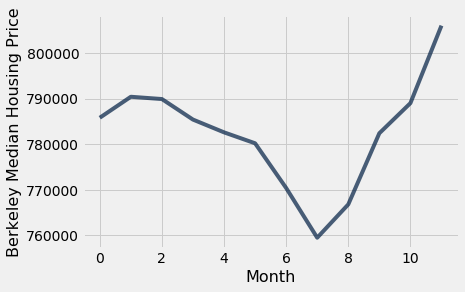

In [49]:
draw_line_plot("Month", np.arange(0, 12), "Berkeley Median Housing Price", berkeley_2019)

Feel free to experiment with the plot above by switching the fourth argument, `y_data`, with a different array of UC housing prices. 

#### Question 2.2.1. 

Construct a line plot of UC Merced's 2019 housing prices with both axes labeled accordingly.

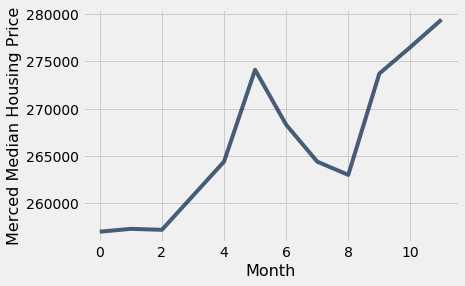

In [56]:
draw_line_plot("Month", np.arange(0, 12), "Merced Median Housing Price", ucm_2019) #SOLUTION

#### Question 2.2.2. 

Is there anything unusual you notice about the graph above? What may cause the unsual trend you notice?

***Write your answer here, replacing the text.***

#### SOLUTION: 
There seems to be a sharp decrease in price during the summer months starting in May. Answers may vary. Sample answer: since subletting in the Summer involves the prices of leases to decrease, perhaps the decrease in housing prices could be partially correlated to the increase in subletting during the Summer months.

#### Question 2.2.3. 

Following a similar lead from above, create a line plot of the monthly percent change in UCLA housing prices from 2009 to 2019.

##### Hint:
Think about what the array of data needs to be. How can we use elementwise subtraction and the percent change formula from above to create an array of percent changes? 

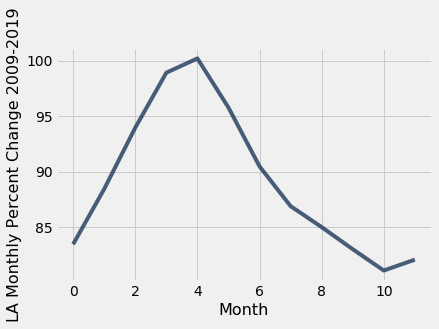

In [57]:
la_monthly_percent_change = ((ucla_2019 - ucla_2009)/ucla_2009)*100 #SOLUTION
draw_line_plot("Month", np.arange(0, 12), "LA Monthly Percent Change 2009-2019", la_monthly_percent_change) #SOLUTION

#### (b) Scatter Plots

For the remainder of the lab, let's transition to examining comic book characters from a marvel dataset. Run the next cell to load it. The cell creates 3 arrays: 

`names` contains the characters' names,

`appearances` contains their appearance counts, 

`genders` contains their genders, and 

`first_appearance_years` contains the years when they first appeared. 

The arrays are displayed in a table.

In [4]:
# This might take a minute or two. 
marvel_url = "https://github.com/fivethirtyeight/data/raw/master/comic-characters/marvel-wikia-data.csv"
marvel = load_and_clean_table(marvel_url)
names = marvel.column("Name")
appearances = marvel.column("Appearances")
genders = marvel.column("Gender")
first_appearance_years = marvel.column("Year")
marvel

Publisher,Name,Gender,Appearances,Year,Month
Marvel,Spider-Man (Peter Parker),Male,4043,1962,8
Marvel,Captain America (Steven Rogers),Male,3360,1941,3
Marvel,"Wolverine (James \""Logan\"" Howlett)",Male,3061,1974,10
Marvel,"Iron Man (Anthony \""Tony\"" Stark)",Male,2961,1963,3
Marvel,Thor (Thor Odinson),Male,2258,1950,11
Marvel,Benjamin Grimm (Earth-616),Male,2255,1961,11
Marvel,Reed Richards (Earth-616),Male,2072,1961,11
Marvel,Hulk (Robert Bruce Banner),Male,2017,1962,5
Marvel,Scott Summers (Earth-616),Male,1955,1963,9
Marvel,Jonathan Storm (Earth-616),Male,1934,1961,11


For this portion of the lab, we've provided a function called `draw_scatter_plot`.  It's very similar to `draw_line_plot`, except that it doesn't connect points with lines.  It takes four arguments:

1. `x_label` the horizontal axis label (a string),
2. `x_data` an array containing the horizontal ("x") values of the points to draw,
3. `y_label` the vertical axis label (a string), and
4. `y_data` an array containing the vertical ("y") values of the points to draw, having the same length as `x_data`.

In [ ]:
def draw_scatter_plot(x_label, x_data, y_label, y_data):
    """Draws a scatter plot of the given data. """
    Table().with_columns(x_label, x_data, y_label, y_data).scatter(x_label)

From the table above, it looks like Spider-Man appeared in a lot of comics!  But does that mean that he appeared in *most* comics? Let's try to generalize this to all Marvel characters.

#### Question 2.3.1.
Compute an array containing these appearance proportions for every character. 

***Hint***: We can find proportion by taking an array and dividing by the sum of that array.

In [7]:
appearance_proportions = appearances / sum(appearances) #SOLUTION
appearance_proportions

array([0.01588068, 0.0131979 , 0.01202344, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
_ = ok.grade('q231')

#### Question 2.3.2.
Among the 4 arrays of data about comic book characters, it only makes sense to make a scatter plot of one array against one other array.  Identify those arrays and make a scatter plot.

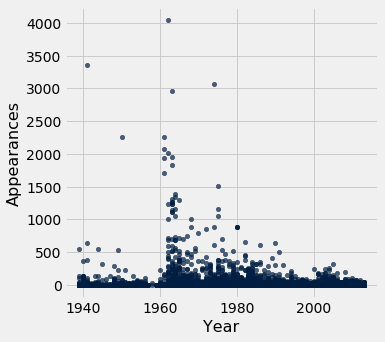

In [8]:
draw_scatter_plot("Year", first_appearance_years, "Appearances", appearances) #SOLUTION

#### Question 2.3.3.

You should have had the number of appearances on the vertical axis in your plot. Make the same plot, but plot the proportion of appearances instead.

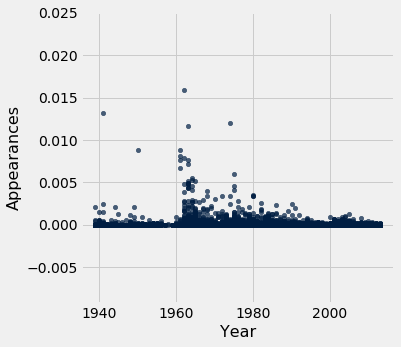

In [9]:
draw_scatter_plot("Year", first_appearance_years, "Appearances", appearance_proportions) #SOLUTION

#### Question 2.3.4
The plot shouldn't look very different from your previous one, even though the data are different. Why do you think that happened?

***Write your answer here, replacing the text.***

**SOLUTION:** Python chooses the scale of the axes so that the data fit into the plot and use the whole plot frame.  We have just divided all the vertical values by a fixed number (the total number of appearances), but Python compensates by shrinking the scale of the vertical axis.

#### (c) Bar Plots

Let's transition to our last type of data visualization, bar plots. We've also created a function called `draw_bar_plot`. It's similar to the two functions used in the previous parts. It takes four arguments:

1. `categories_label` the vertical (category) axis label (a string),
2. `categories` an array containing the categories in the dataset (strings),
3. `values_label` the horizontal (bar size) axis label (a string, for example "count" or "proportion"), and
4. `values` an array of numbers containing the lengths of the bars for each category, having the same length as `categories`.

In [10]:
def draw_bar_plot(categories_label, categories, values_label, values):
    Table().with_column(categories_label, categories)\
        .with_column(values_label, values).barh(categories_label)

Consider our comic book data. In the following cell, we have computed the number of characters of each gender, using a method you will see later. 

In [11]:
marvel_by_gender = marvel.group("Gender")
gender_types = marvel_by_gender.column("Gender")
gender_type_counts = marvel_by_gender.column("count")
marvel_by_gender

Gender,count
Agender,36
Female,3628
Genderfluid,2
Male,11100
Unknown,795


#### Question 2.4.1.
Use the arrays gender and count defined above to create a barplot of character genders across all characters in the marvel database.

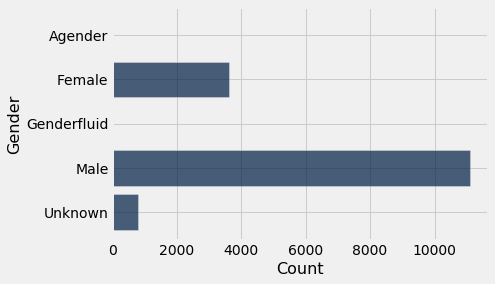

In [12]:
draw_bar_plot("Gender", gender_types, "Count", gender_type_counts) #SOLUTION

The cell below computes the total number of appearances by characters of each gender. It creates an array named `appearances_by_gender` containing those numbers.

In [13]:
grouped_by_gender = marvel.group("Gender", sum).select("Gender", "Appearances sum")
appearances_by_gender = grouped_by_gender.column("Appearances sum")
grouped_by_gender

Gender,Appearances sum
Agender,790
Female,71129
Genderfluid,565
Male,178881
Unknown,3221


#### Question 2.4.2. 
Create a bar chart of the number of appearances.

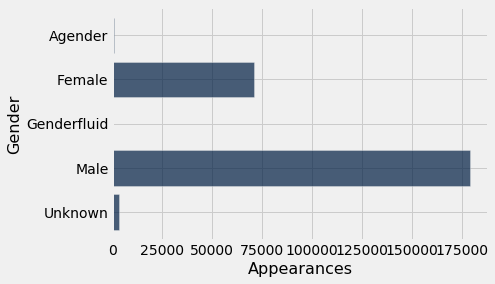

In [15]:
draw_bar_plot("Gender", gender_types, "Appearances", appearances_by_gender) #SOLUTION

#### Question 2.4.3.
What is the difference between the two plots? What does each represent?

***Write your answer here, replacing this text.***

**SOLUTION:** The first plot represents number of characters by gender, whereas the second represents number of character appearances by gender.

#### Question 2.4.4.
Do male characters tend to have more appearances than female characters on average? It isn't clear from the two plots. Compute the proportion of characters having each gender (`gender_type_proportions`) and the proportion of character appearances by gender (`appearance_proportions_by_gender`).  Then create two bar charts to display those proportions.

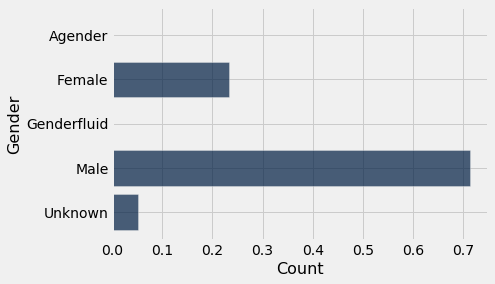

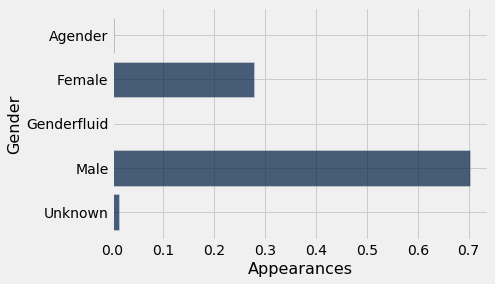

In [17]:
gender_type_proportions = gender_type_counts / sum(gender_type_counts) #SOLUTION
appearance_proportions_by_gender = appearances_by_gender / sum(appearances_by_gender) #SOLUTION

draw_bar_plot("Gender", gender_types, "Count", gender_type_proportions) #SOLUTION
draw_bar_plot("Gender", gender_types, "Appearances", appearance_proportions_by_gender) #SOLUTION

#### Question 2.4.5.
Looking at the two plots, do male or female characters tend to have more appearances per character, on average? How can you tell?

***Write your answer here, replacing this text.***

**SOLUTION:** Female characters tend to have more appearances. They make up about 23% of characters but 28% of appearances, whereas male characters made up 71% of characters but only 70% of appearances.

#### Question 2.4.6
Let's verify that conclusion with a computation. Using the names defined above, calculate the average number of appearances per character for each gender, and name it `appearances_per_character_by_gender`. Then draw a bar chart displaying those averages for each gender.

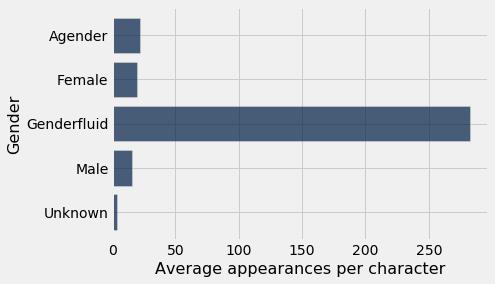

In [18]:
appearances_per_character_by_gender = appearances_by_gender / gender_type_counts #SOLUTION
draw_bar_plot("Gender", gender_types, "Average appearances per character", appearances_per_character_by_gender) #SOLUTION

In [19]:
appearances_per_character_by_gender

array([ 21.94444444,  19.60556781, 282.5       ,  16.11540541,
         4.05157233])

In [20]:
_ = ok.grade('q246')

#### Congratulations, you're done with lab 6!  Be sure to...
- **Run all the tests** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**,
- and ask one of the staff members to check you off.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once.
_ = ok.grade_all()

In [ ]:
_ = ok.submit()